## Generate Some Data

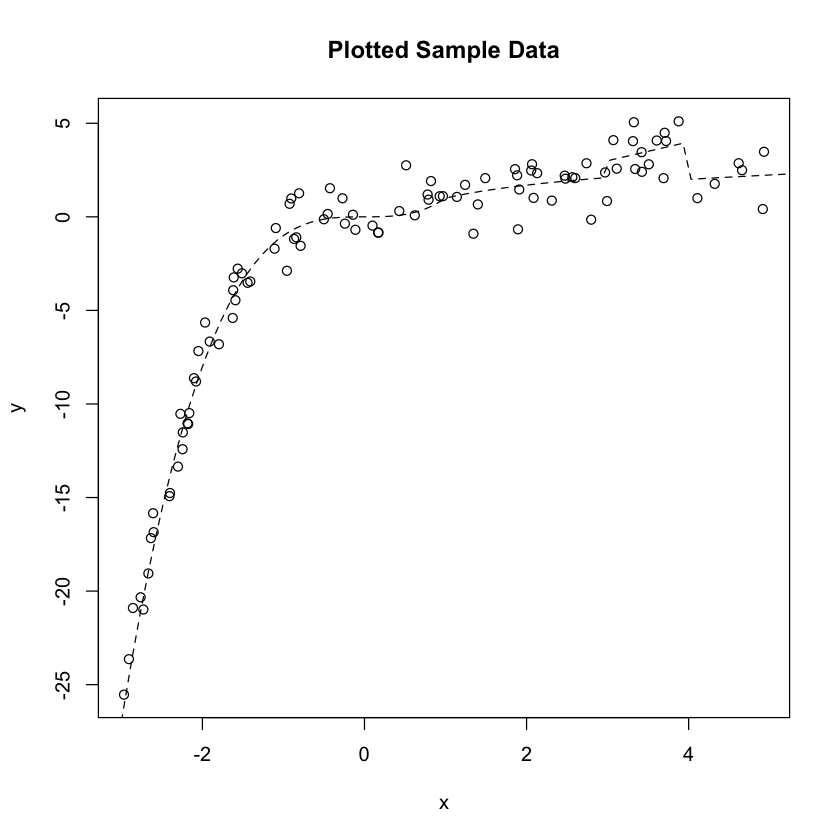

In [190]:
# generate some data
set.seed(34243411) 
n <- 100
from <- -3
to <- 5
x <- runif(n, from, to)
mu <- function(x) {
    id <- x > 1 & x < 3
    id.comp <- x<=1 
    x[id] <- log(x[id]) + 1
    x[id.comp] <- x[id.comp]^3
    id2 <- x > 4
    x[id2] <- sqrt(x[id2])
    return(x)
}
resids <- function(n) {rnorm(n,0,1)} 

y <- mu(x) + resids(n)
plot(x,y, main='Plotted Sample Data')
funx <- seq(from = min(x)-1, to=max(x)+1, length.out = 100)
lines(funx, mu(funx), lty=2, )

# Spline Smoothing

In [191]:
library(splines)

Warning message:
In bs(x, degree = 3L, knots = structure(c(-2.26161452638917, -1.62185584474355, : some 'x' values beyond boundary knots may cause ill-conditioned basesWarning message:
In bs(x, degree = 3L, knots = structure(c(-2.90061381831765, -2.83355034841225, : some 'x' values beyond boundary knots may cause ill-conditioned bases

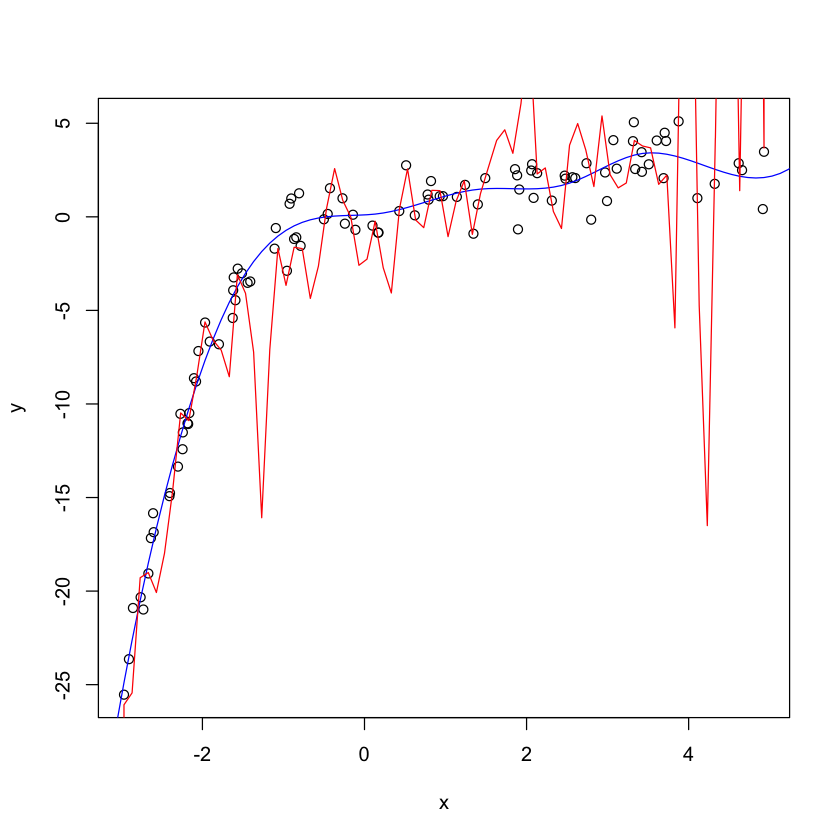

In [239]:
## Start with a p-degree spline
plot(x,y)
# fits a cubic polynomial with  7 knotsb
lines(funx, predict(lm(y ~ bs(x, degree = 3, df=10)), data.frame(x = funx)), col='blue')
# fits a cubic polynomial with no knots
lines(funx, predict(lm(y ~ bs(x, degree=3, df=length(x)-10)), data.frame(x = funx)), col='red')

Warning message:
In bs(x, degree = 3L, knots = structure(c(-2.26161452638917, -1.62185584474355, : some 'x' values beyond boundary knots may cause ill-conditioned bases

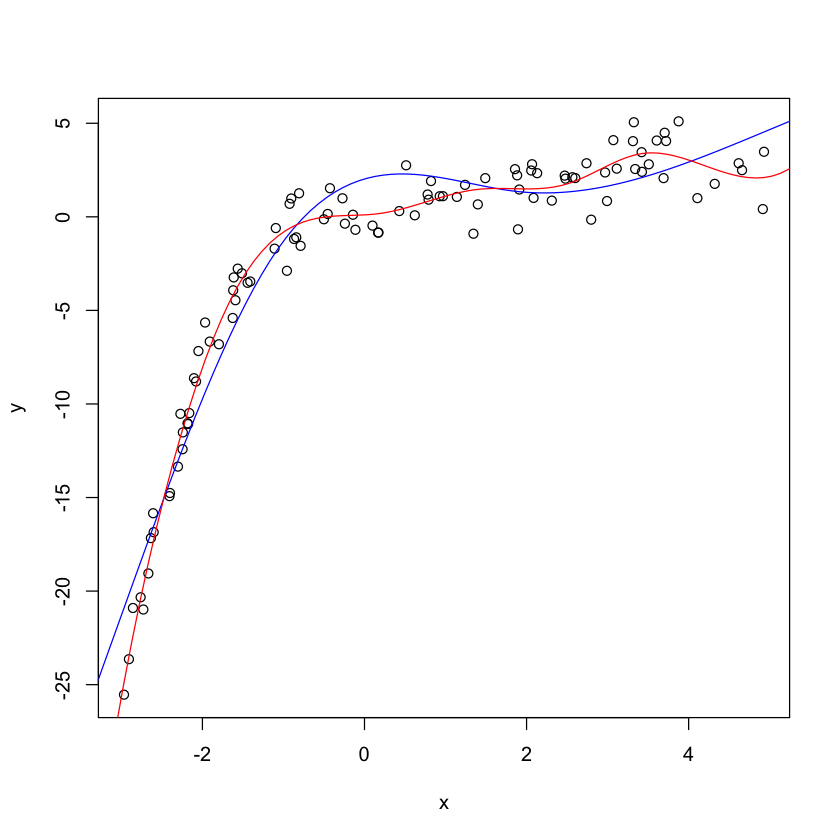

In [244]:
plot(x,y)
# fits a natural spline
lines(funx, predict(lm(y ~ ns(x, df=3)), data.frame(x = funx)), col='blue')
# fits a cubic polynomial with no knots
lines(funx, predict(lm(y ~ bs(x, degree=3, df=10)), data.frame(x = funx)), col='red')

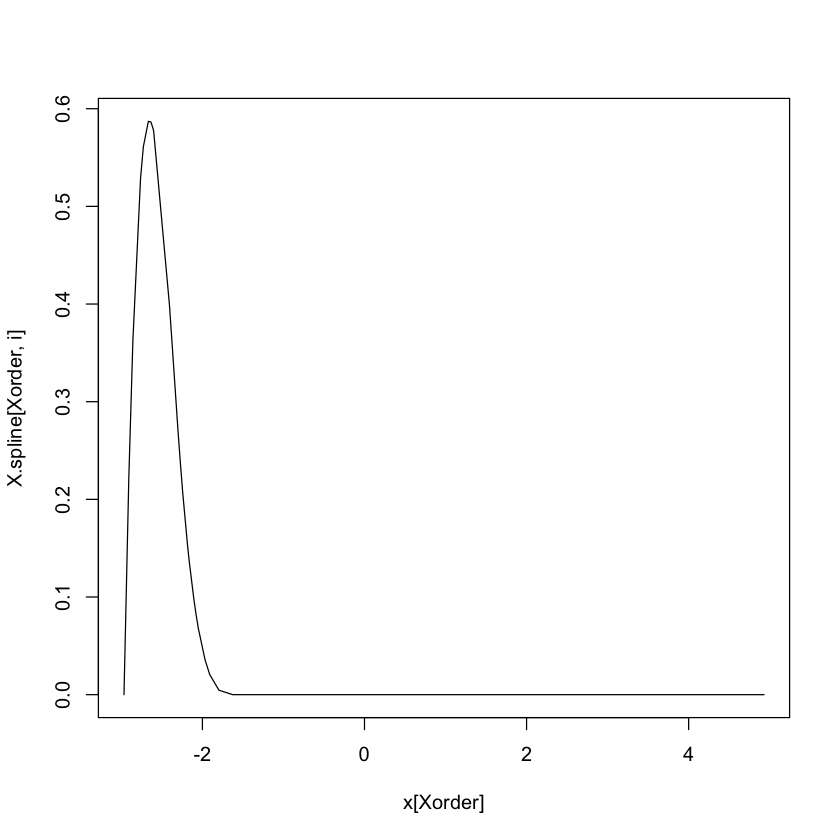

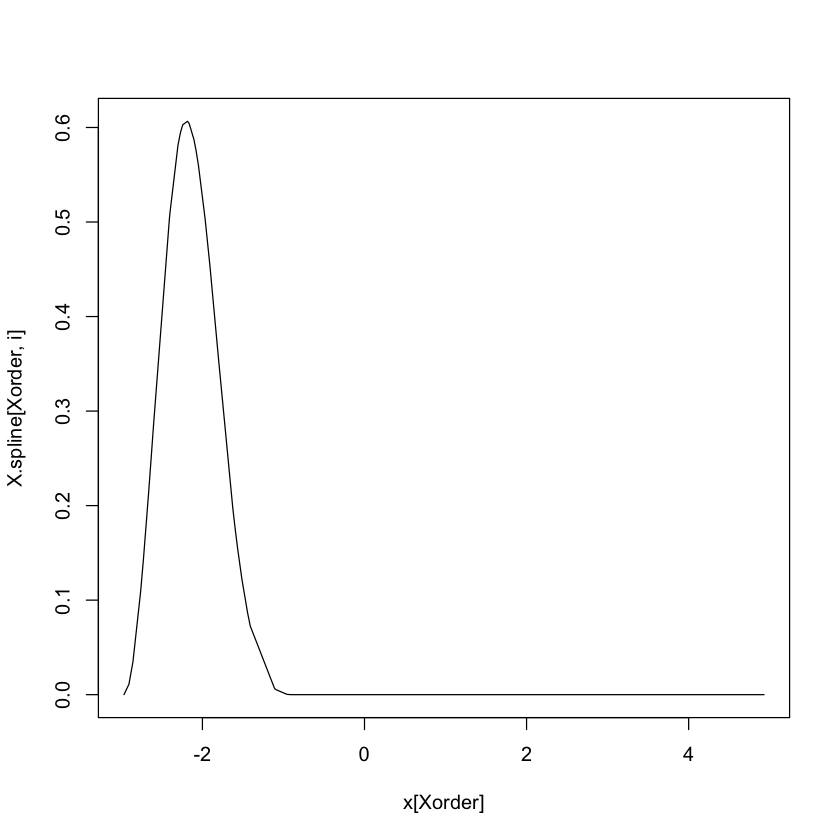

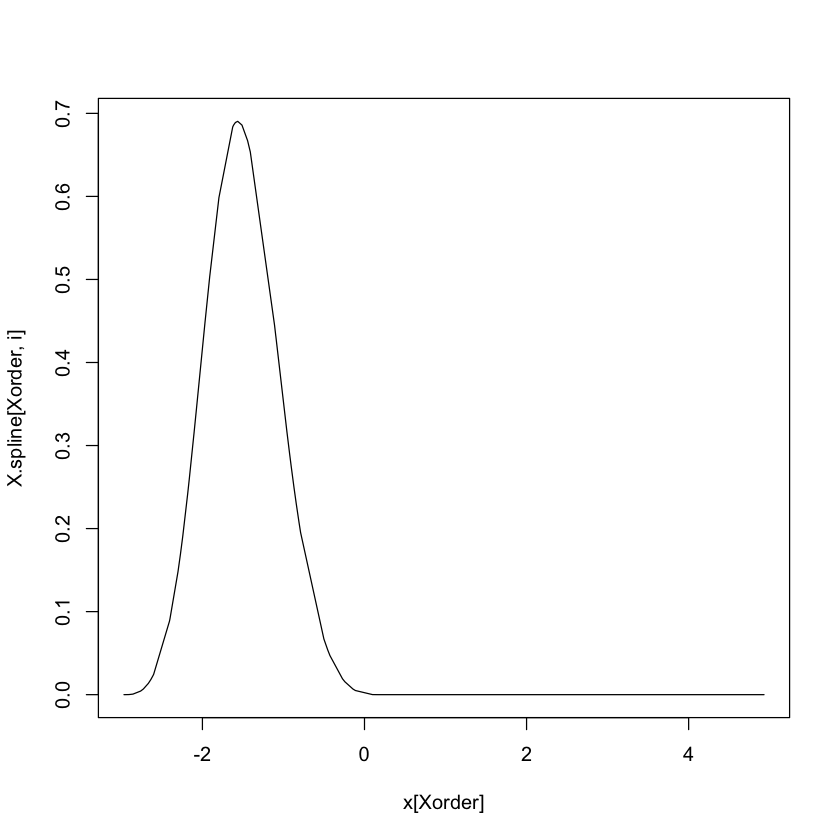

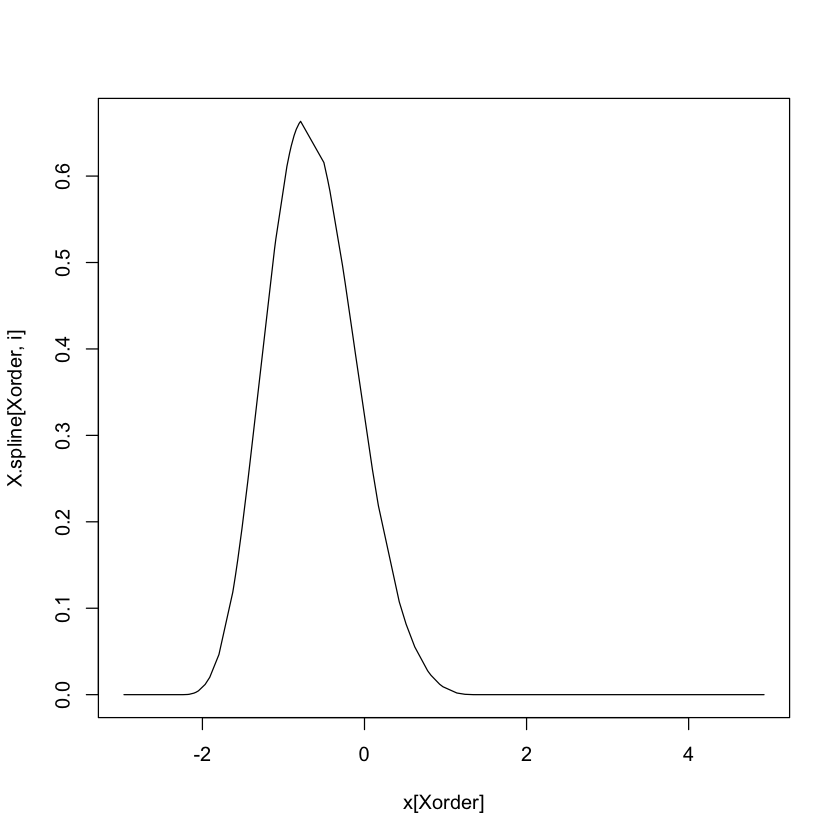

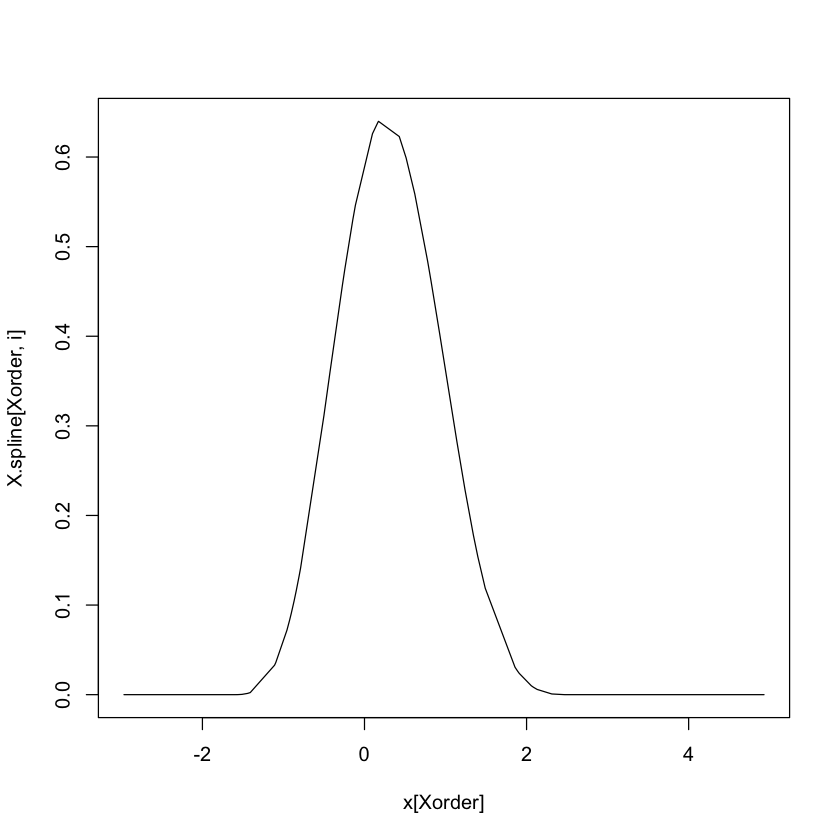

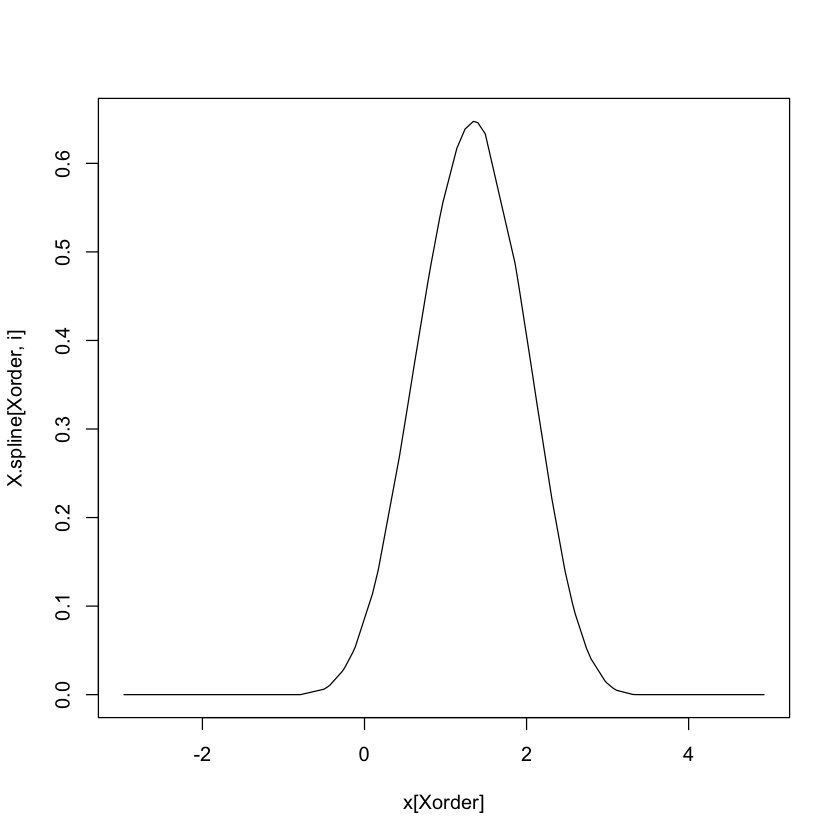

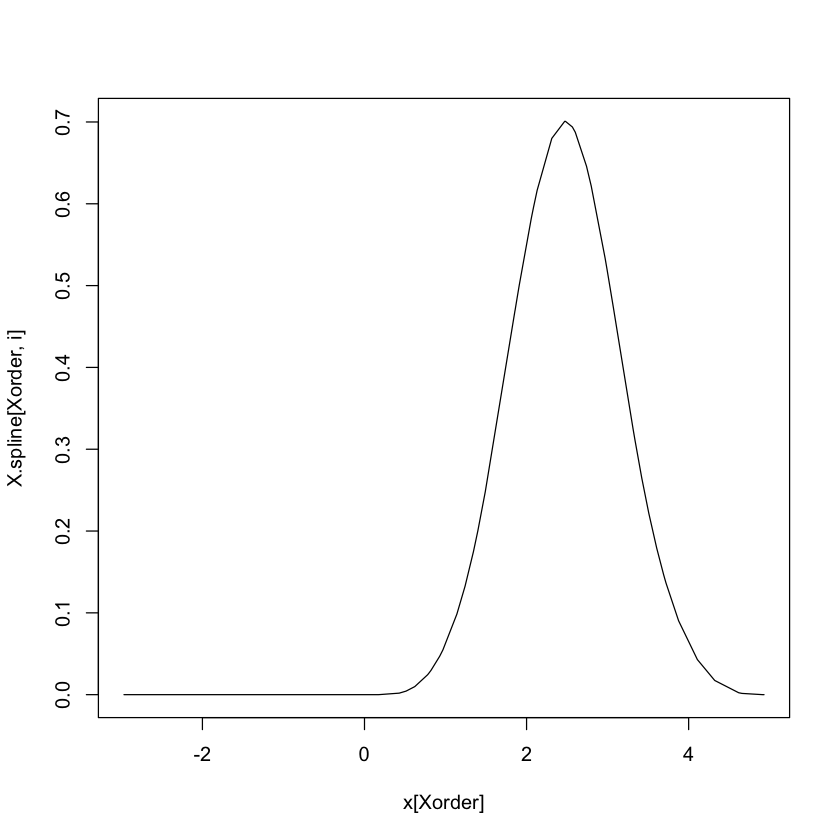

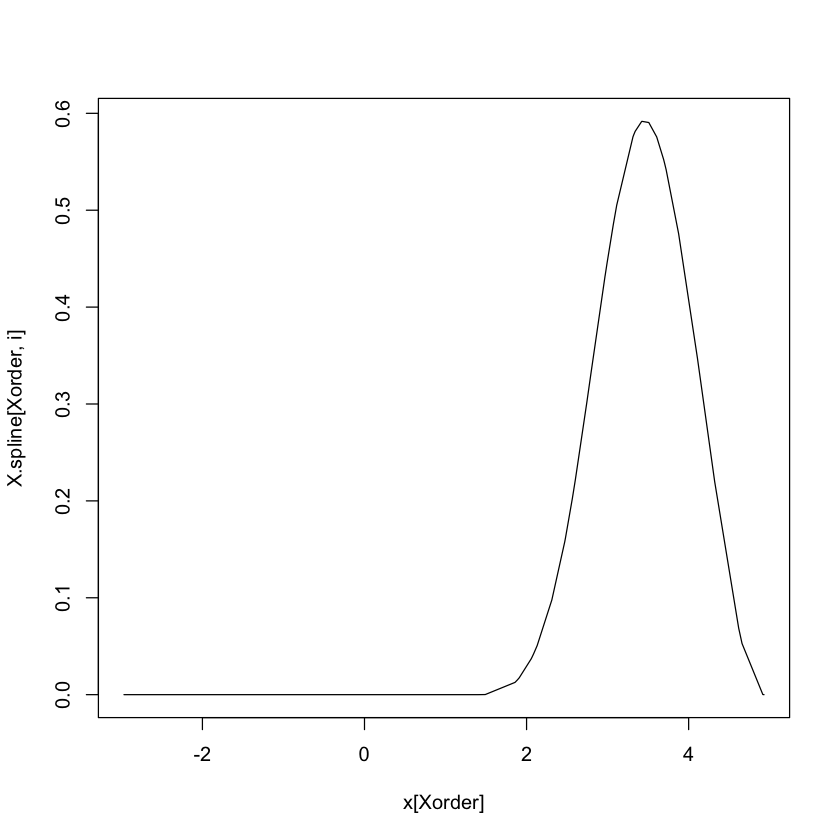

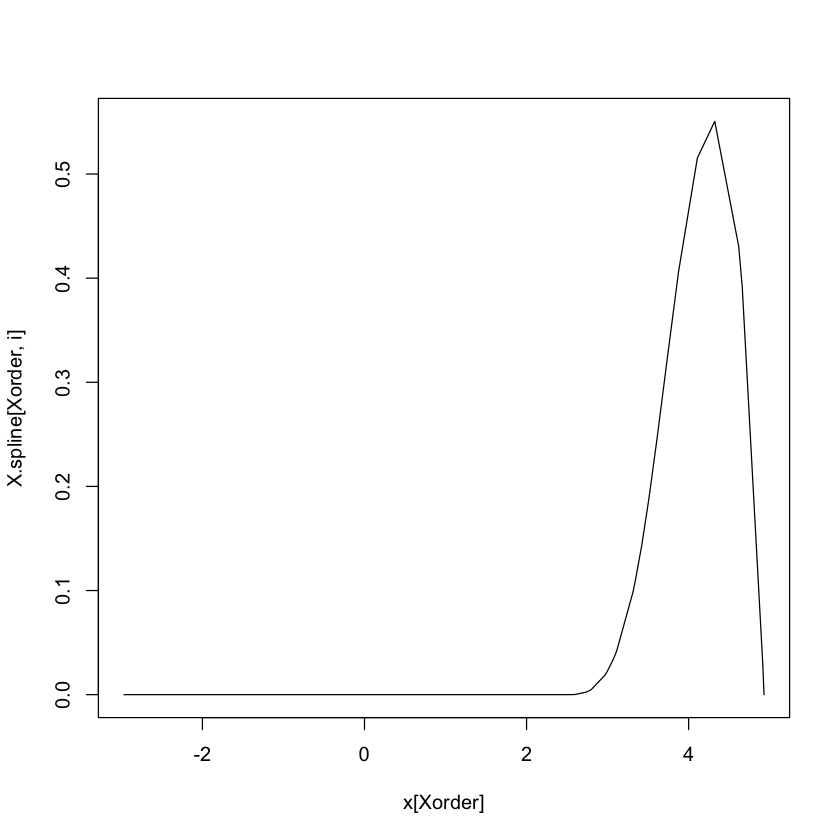

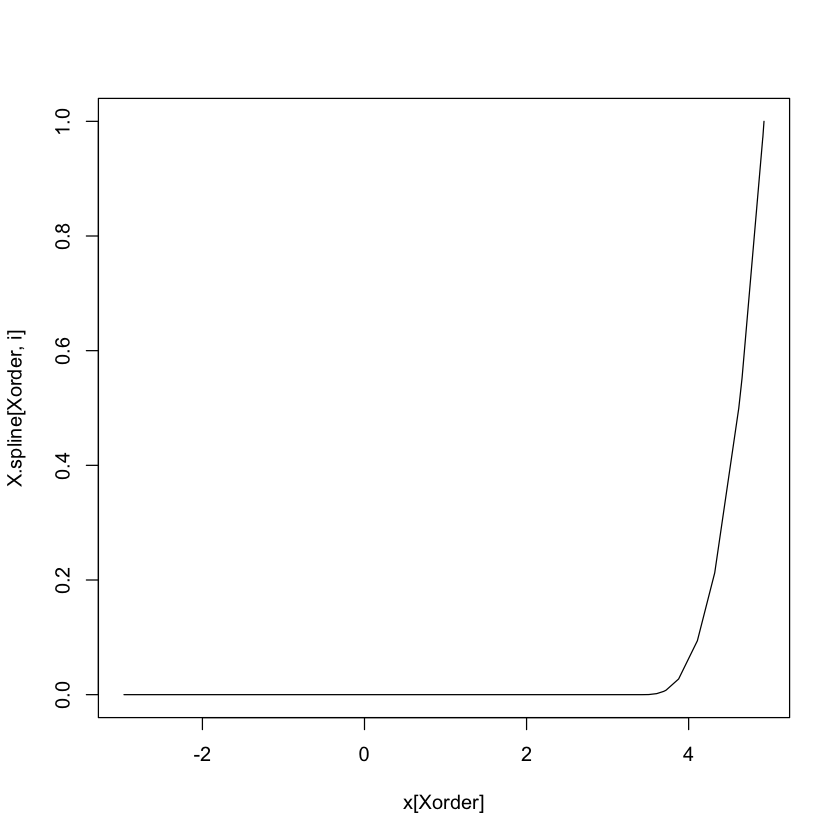

In [194]:
# can look at the number of 
X.spline <- bs(x, df=10, degree=3)
Xorder <- order(x)

for (i in 1:ncol(X.spline)){

    plot(x[Xorder], X.spline[Xorder,i], type='l')
}

# Smoothing Splines

In [258]:
library(MASS)

Warning message:
In bs(x, degree = 3L, knots = structure(c(-2.26161452638917, -1.62185584474355, : some 'x' values beyond boundary knots may cause ill-conditioned bases

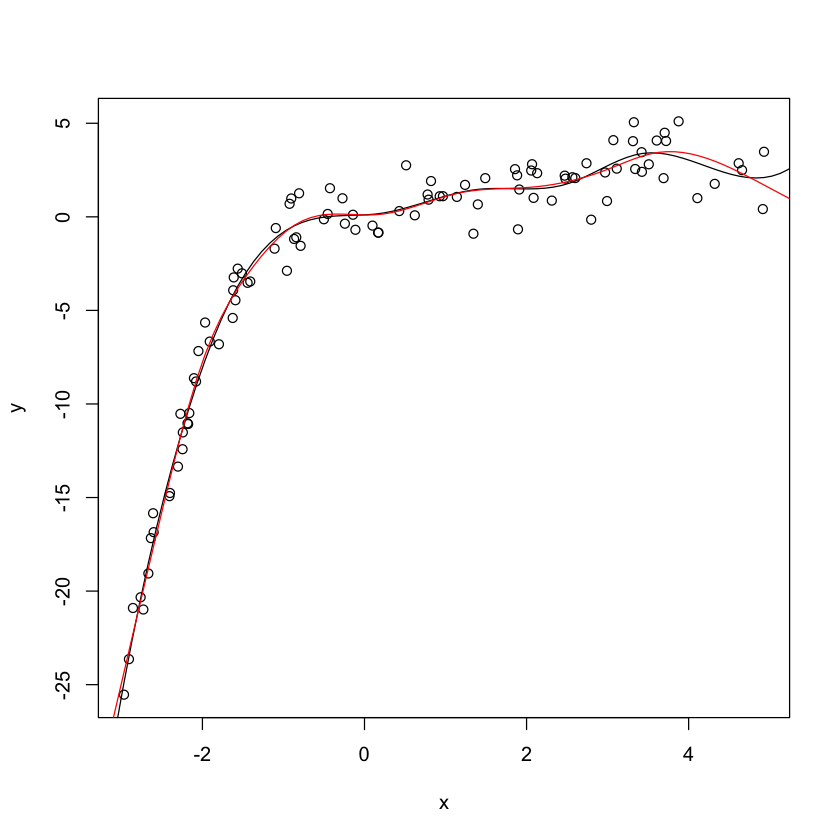

In [278]:
# a naural spline that fits at every point
plot(x,y)
Xorder <- order(x)
N <- bs(x[Xorder], degree = 3, df=5)

lines(funx, predict(lm(y ~ bs(x, degree = 3, df=10)), newdata= data.frame(x=funx)))
lines(funx, predict(lm(y ~ ns(x, df=10)), newdata= data.frame(x=funx)), col='red')

In [197]:
smootherMatrix <- function(x,df) { n <- length(x)
    S <- matrix(0, n, n)
    for (i in 1:n) {
        ei = rep(0, n)
        ei[i] <- 1
        # insert the fit into the i'th column of S
        S[,i] <- predict(smooth.spline(x, ei, df=df), x)$y
    }
      # To make sure the result is (numerically) symmetric
    S <- (S + t(S))/2
    # and return the symmetric matrix S
    return(S)
}


[1] 10.00131

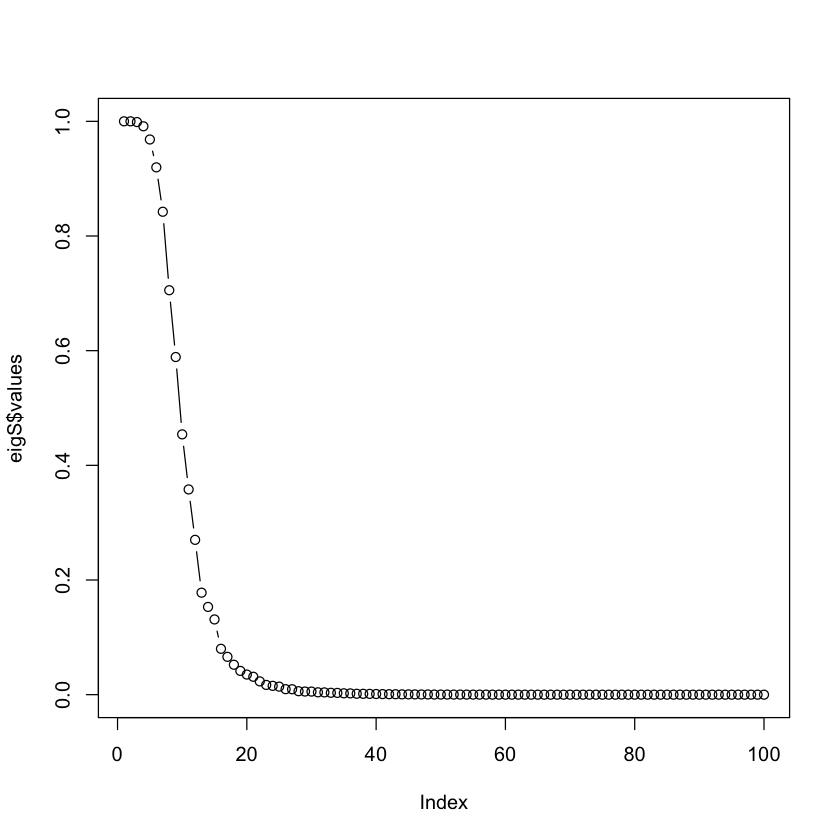

In [198]:
S.lambda <- smootherMatrix(x, 10)
eigS <- eigen(S.lambda)
plot(
    eigS$values, type='b')
sum(eigS$values)

In [199]:
t(S.lambda[,1]) %*% y

0.1476766


# Local Smoothers

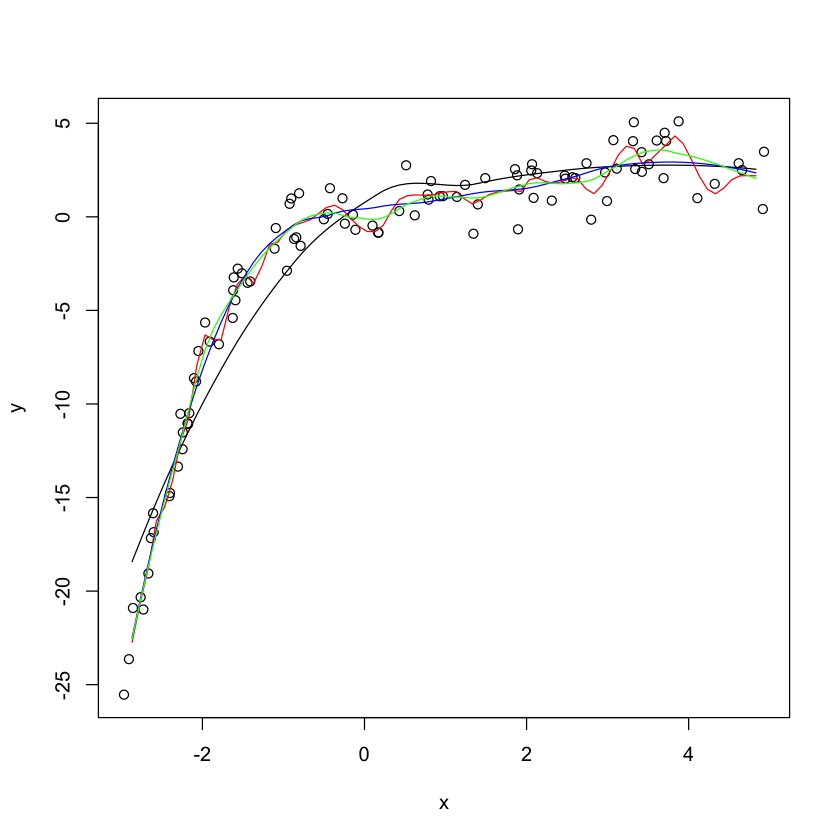

In [222]:
plot(x,y)
lines(funx, predict(loess(y ~ x, span=1), newdata= data.frame(x=funx)))
lines(funx, predict(loess(y ~ x, span=0.1), newdata= data.frame(x=funx)), col='red')
lines(funx, predict(loess(y ~ x, span=0.5), newdata= data.frame(x=funx)), col='blue')
lines(funx, predict(loess(y ~ x, span=0.25), newdata= data.frame(x=funx)), col='green')

In [249]:
kernel <- function(x, xi, h=1){
    sum(dnorm((x - xi)/h))
}

In [254]:
w <- sapply(x, function(xi){
    kernel(xi, x)
})

In [255]:
w

[1] 11.893750  4.365355 14.385384 13.420629  4.423678 10.887437 10.951392
  [8] 11.366239  9.546372 11.500902 13.690564 13.465452  5.675128 11.629019
 [15] 14.706475 12.153544 11.489676 11.525893 14.634170 11.118529 14.710063
 [22]  9.498563 13.353533 13.610385 11.097125 10.975824 11.603795 13.547365
 [29] 10.607776 14.709403 10.142332 14.198749 10.909540  9.894815  6.976126
 [36] 13.737753 12.559286 11.619736 10.857820 10.399236 11.628975 10.675313
 [43] 12.914654 14.699048 14.592360 11.373746  5.495712  8.855542 12.733221
 [50] 11.483338 11.047000 13.811237 10.906332 10.887198 13.476049 10.648758
 [57] 12.623601  9.473897 10.999889 13.872784 11.546187 12.884652 11.168898
 [64] 14.489134 11.418533  9.436788 11.425936 14.623823 10.915873 11.385115
 [71] 10.232209 12.216162 14.674987 14.709859 11.074175 13.579508 11.085521
 [78] 11.646541 11.528758 14.101782 13.591769 11.806664 11.951814 14.121594
 [85] 14.132092 11.320491 10.387837 11.848163  7.906343 13.826454 11.029691
 [92] 11.288204 11.503956 11.458710 11.347353  9.834181 14.049705 13.798813
 [99] 10.899460 11.610830